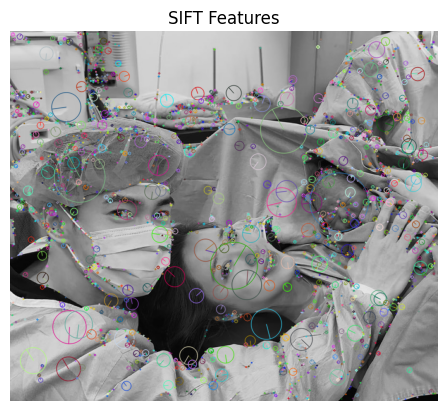

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 讀取影像
image = cv2.imread(r'', cv2.IMREAD_GRAYSCALE)

# 建立 SIFT 物件
sift = cv2.SIFT_create()

# 偵測特徵點並計算描述子
keypoints, descriptors = sift.detectAndCompute(image, None)

# 在影像上繪製特徵點
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 顯示影像
plt.imshow(sift_image, cmap='gray')
plt.title('SIFT Features')
plt.axis('off')
plt.show()


從 CSV 檔案 all_kol_post_detail_0425.csv 中讀取所有的 post_id。

根據 post_id，從 C:\Users\SHI\Desktop\KOL\ig_photos\ 中找到對應資料夾與圖片檔案。

例如：ookoukioo_007 ➝ 資料夾為 ookoukioo，圖片為 ookoukioo_007.jpg

對每張圖片進行 SIFT 特徵提取。

In [4]:

#讀取C:\Users\SHI\Desktop\KOL\analysis\all_kol_post_detail_0425.csv

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# 讀取 CSV 檔案
csv_path = r'C:\Users\SHI\Desktop\KOL\analysis\kol_post&kol_feature_0425.csv'
if not os.path.exists(csv_path):
    raise ValueError("CSV 檔案不存在，請確認路徑是否正確")
df = pd.read_csv(csv_path)
df

,post_link,post_id,author,cooperator,article,hashtags,product_links,mentions,post_time,image_url,...,post_num,followers_num,following_num,avg_likes,avg_comments,post_count,avg_posts_per_month,avg_posts_per_active_month,author_gender,label
0,https://www.instagram.com/ookoukioo/p/DCs4fJeS...,ookoukioo_007,ookoukioo,NaN,久久沒出門～跟朋友打【寶可夢牌】比賽！EJ在旁邊偷拍我😆\n\n對了！說到PTCGP課金~我...,NaN,1,NaN,2024-11-23 04:57:39,https://scontent-tpe1-1.cdninstagram.com/v/t51...,...,153,189000,517,19773,136,100,2.21,2.00,1.0,high
1,https://www.instagram.com/chiaochiaotzeng/p/Cl...,chiaochiaotzeng_074,chiaochiaotzeng,NaN,你們喜歡聖誕市集嗎？🎄\n（我超喜歡哦✨✨✨✨✨）\n這個週末，12/3和12/4歡迎大家來...,"#參與辦法詳情請至綠咖頁面查詢, #我家的胖胖聖誕樹好可愛呀, #綠咖小型聖誕市集",0,@liukagreengreengreen,2022-12-02 13:50:24,https://instagram.ftpe8-4.fna.fbcdn.net/v/t51....,...,2271,1518000,1090,33362,179,100,2.96,2.96,0.0,high
2,https://www.instagram.com/wanna10_4/p/CnOyzMPS...,wanna10_4_055,wanna10_4,NaN,大家好，我是美麗妄娜\n出社會六年，\n現在也22歲了\n中間經歷過很多波折\n生過病 傻傻...,NaN,0,NaN,2023-01-10 10:23:06,https://instagram.ftpe7-1.fna.fbcdn.net/v/t51....,...,223,475000,1284,23631,99,100,3.00,3.00,0.0,high
3,https://www.instagram.com/emo.english.learn/p/...,emo.english.learn_051,emo.english.learn,NaN,你的學校還有這些規定嗎？\n你最希望哪個規定去廢除？或是復活？\n(我最希望當初升旗能改成廣...,"#作文, #學測, #英文",0,NaN,2024-06-07 10:17:41,https://scontent-tpe1-1.cdninstagram.com/v/t51...,...,267,58000,199,6342,25,100,7.42,7.42,2.0,high
4,https://www.instagram.com/wanna10_4/p/CdAJ1A7M...,wanna10_4_088,wanna10_4,NaN,''她什麼都不在乎，所以她一直漂亮''\n\n最近心情起伏不定\n但也為了找原因\n因此更了...,NaN,1,@lunasxka,2022-05-01 04:41:47,https://instagram.ftpe7-2.fna.fbcdn.net/v/t51....,...,223,475000,1284,23631,99,100,3.00,3.00,0.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,https://www.instagram.com/jy_luv.peace/p/C1J84...,jy_luv.peace_065,jy_luv.peace,NaN,大家應該都有工作壓力大或有心事的時候導致睡不好的經驗吧？🥹\n我是如果隔天有什麼重要的拍攝或...,"#BettersleepBetterme, #不含西藥成分, #你的營養管, #全素飲品, ...",1,NaN,2023-12-22 12:34:35,https://instagram.ftpe7-1.fna.fbcdn.net/v/t39....,...,181,269000,185,7843,69,100,4.76,4.55,NaN,low
4278,https://www.instagram.com/walkerdad1228/p/DD_9...,walkerdad1228_005,walkerdad1228,NaN,🎊活動公告🎊\n12/28 14:00新北耶誕城義賣活動（當天CCK團員會來幫忙）\n12/...,#義賣整理進度80,0,NaN,2024-12-25 11:15:23,https://scontent-tpe1-1.cdninstagram.com/v/t51...,...,1028,78000,383,4386,53,100,8.14,8.14,NaN,low
4279,https://www.instagram.com/lene_lai/p/CwPDn1ABoRC/,lene_lai_018,lene_lai,NaN,七夕快樂🌹\n來一點甜甜💞\n\n#LeneXBonbons\n聯名中最夢幻的一款休閒鞋💞\...,"#LeneXBonbons, #大推粉色, #此款有粉白黑三色",0,@bonbonstw,2023-08-22 05:32:39,https://scontent-tpe1-1.cdninstagram.com/v/t51...,...,209,302000,91,6429,45,100,2.28,1.85,NaN,low
4280,https://www.instagram.com/kuanyu1029/p/Ca9upcF...,kuanyu1029_055,kuanyu1029,NaN,2022 RISE UP 全新球員應猿商品 即刻火熱預購\n\n2022 RISE UP 全...,"#RISEUP, #RakutenMonkeys, #RakutenMonkeysShop,...",0,NaN,2022-03-11 13:03:00,https://scontent-tpe1-1.cdninstagram.com/v/t51...,...,364,100000,277,8439,69,100,2.43,1.88,NaN,low


SIFT 特徵提取: 100%|██████████| 5/5 [00:06<00:00,  1.40s/it]


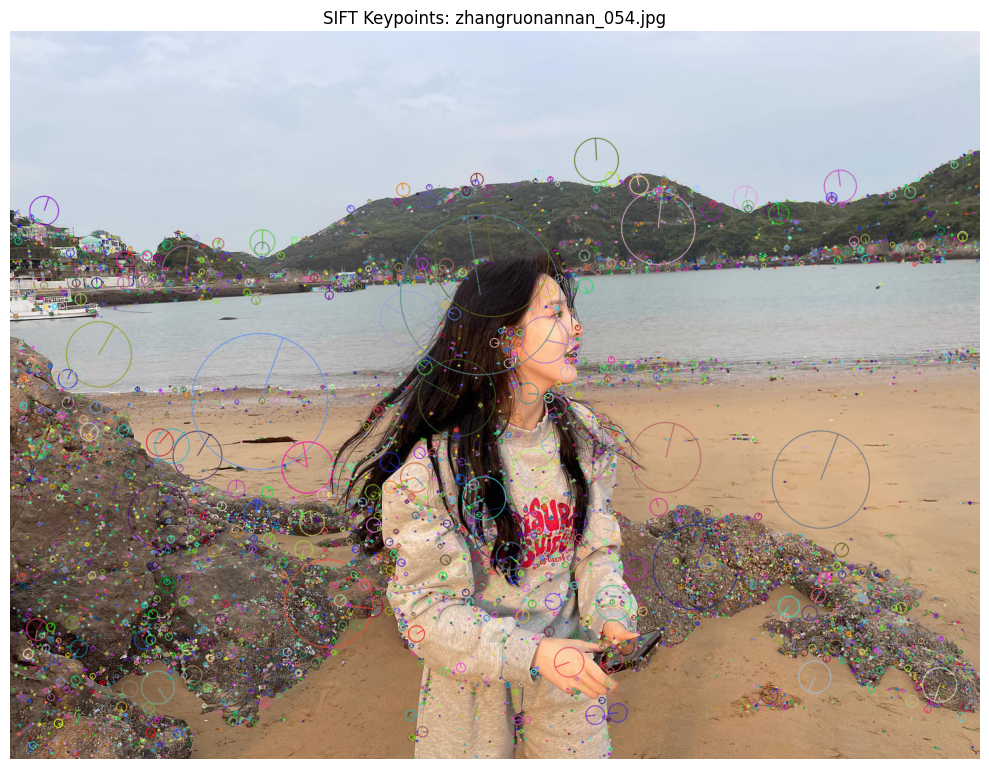

In [8]:
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle  # 新增 pickle 模組來處理不規則的資料結構

# 1. 讀取 CSV 並選取前 5 張圖的 post_id（根據你的原始代碼是 5 張而非 10 張）
csv_path = r"C:\Users\SHI\Desktop\KOL\analysis\all_kol_post_detail_0425.csv"
image_root = r"C:\Users\SHI\Desktop\KOL\ig_photos"

df = pd.read_csv(csv_path)
post_ids = df['post_id'].dropna().astype(str).tolist()[:5]

# 2. 初始化 SIFT
sift = cv2.SIFT_create()

# 3. 建立儲存空間
image_descriptors = []
image_paths = []
image_keypoints = {}

# 4. 擷取每張圖的 SIFT 特徵
for post_id in tqdm(post_ids, desc="SIFT 特徵提取"):
    folder_name = post_id.rsplit("_", 1)[0]
    image_filename = f"{post_id}.jpg"
    image_path = os.path.join(image_root, folder_name, image_filename)

    if not os.path.exists(image_path):
        print(f"找不到圖片: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取圖片內容: {image_path}")
        continue

    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        image_descriptors.append(descriptors)
        image_paths.append(image_path)
        image_keypoints[image_path] = keypoints
    else:
        image_descriptors.append(np.zeros((0, 128), dtype=np.float32))
        image_paths.append(image_path)
        image_keypoints[image_path] = []

# 5. 建立 Bag-of-Words 詞彙表
all_descriptors = np.vstack([desc for desc in image_descriptors if desc.shape[0] > 0])
n_clusters = 30  # 詞彙數可視需要調整
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(all_descriptors)

# 6. 將每張圖的 descriptor 轉為 BoW 向量
def encode_bow(descriptors, kmeans_model):
    if descriptors.shape[0] == 0:
        return np.zeros(kmeans_model.n_clusters)
    pred = kmeans_model.predict(descriptors)
    hist, _ = np.histogram(pred, bins=np.arange(kmeans_model.n_clusters + 1))
    return hist / (hist.sum() or 1)  # 避免除以零的情況

# 正確寫法：每一個都是 numpy array，最後 vstack 起來
bow_vectors = [encode_bow(desc, kmeans) for desc in image_descriptors]
bow_vectors = np.vstack(bow_vectors)

# 7. 儲存 descriptor 與 BoW 特徵
# 使用 pickle 儲存不規則形狀的 image_descriptors 列表
with open("sift_descriptors_5.pkl", "wb") as f:
    pickle.dump(image_descriptors, f)

# 另外，也可以分別儲存每個描述符
for i, desc in enumerate(image_descriptors):
    np.save(f"sift_descriptor_{i}.npy", desc)

# BoW 向量是規則的，可以直接儲存
np.save("sift_bow_vectors_5.npy", bow_vectors)
pd.DataFrame(bow_vectors).to_csv("sift_bow_vectors_5.csv", index=False)

# 額外儲存圖片路徑，以便之後匹配
with open("sift_image_paths_5.pkl", "wb") as f:
    pickle.dump(image_paths, f)

# 8. 顯示其中一張圖的 SIFT 特徵點分布
if image_paths:  # 確保有處理成功的圖片
    target_image = image_paths[0]
    target_kps = image_keypoints[target_image]
    img_raw = cv2.imread(target_image)
    img_with_kp = cv2.drawKeypoints(img_raw, target_kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))
    plt.title(f"SIFT Keypoints: {os.path.basename(target_image)}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("沒有成功處理任何圖片")


In [1]:
import os
import pandas as pd
import numpy as np
import glob

# 設定資料夾與輸出位置
folder_path = r"C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT"
output_csv_path = os.path.join(folder_path, "sift_descriptor_only.csv")

# 只讀取 descriptor 檔案
def read_descriptor_files(folder_path):
    return glob.glob(os.path.join(folder_path, "*_sift_descriptor.npy"))

# 從檔名取出 post_id
def extract_post_id(filename):
    base = os.path.basename(filename)
    return base.replace("_sift_descriptor.npy", "")

# 讀取 descriptor 並標示欄位
def read_all_descriptor_files(npy_files):
    all_data = []
    print(f"總共發現 {len(npy_files)} 個 descriptor 檔案")
    
    for idx, file in enumerate(npy_files, start=1):
        print(f" 處理第 {idx} 個檔案：{file}")
        post_id = extract_post_id(file)
        np_data = np.load(file, allow_pickle=True)

        if np_data is None or len(np_data) == 0:
            print(" 空資料，略過")
            continue

        if isinstance(np_data, np.ndarray) and np_data.ndim == 2:
            for descriptor in np_data:
                row = {"post_id": post_id}
                for i, val in enumerate(descriptor):
                    row[f"feature_{i}"] = val
                all_data.append(row)
                
        else:
            print("非二維 descriptor 陣列，略過")

    return all_data

# 主流程
npy_files = read_descriptor_files(folder_path)
all_data = read_all_descriptor_files(npy_files)
print(f"總共讀取 {len(all_data)} 筆 descriptor 特徵")
df = pd.DataFrame(all_data)
print(f"DataFrame 形狀：{df.shape}")


# # 儲存
# df.to_csv(output_csv_path, index=False)
# print(f"\n共儲存 {len(df)} 筆 descriptor 特徵到：{output_csv_path}")


總共發現 4270 個 descriptor 檔案
 處理第 1 個檔案：C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT\0119__yu_005_sift_descriptor.npy
 處理第 2 個檔案：C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT\0119__yu_006_sift_descriptor.npy
 處理第 3 個檔案：C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT\0628marika_008_sift_descriptor.npy
 處理第 4 個檔案：C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT\0628marika_052_sift_descriptor.npy
 處理第 5 個檔案：C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT\0628marika_066_sift_descriptor.npy
 處理第 6 個檔案：C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT\0628marika_081_sift_descriptor.npy
 處理第 7 個檔案：C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT\0960kim0960_005_sift_descriptor.npy
 處理第 8 個檔案：C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT\0960kim0960_015_sift_descriptor.npy
 處理第 9 個檔案：C:\Users\SHI\Desktop\KOL\feature_extraction\ComputerVision\SIFT\0960kim0960_016_sift_

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 取出 SIFT 特徵欄位（feature_0 ~ feature_127）
feature_cols = [col for col in df.columns if col.startswith("feature_")]
X = df[feature_cols].values
print(f"原始特徵形狀：{X.shape}")

# 2. 標準化（建議做）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"標準化後形狀：{X_scaled.shape}")    

# 3. PCA 降維，保留 80% 變異
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA 後形狀：{X_pca.shape}，實際保留維度：{X_pca.shape[1]}")

# 4. 結果存回 DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f"pca_{i}" for i in range(X_pca.shape[1])])
df_pca["post_id"] = df["post_id"].values
print(f"PCA DataFrame 形狀：{df_pca.shape}")    

# 5. 如需儲存
df_pca.to_csv(os.path.join(folder_path, "sift_descriptor_pca_80.csv"), index=False)

PCA 後形狀：(853547, 36)，實際保留維度：36


In [4]:
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,post_id
0,-6.103524,-2.953281,-1.779163,-0.950990,0.682692,-1.315002,-0.090724,1.160205,0.070843,2.440854,...,-0.581158,-0.654682,-0.534516,-0.407987,-0.303384,-0.252550,-0.009742,-0.897997,0.150126,0119__yu_005
1,-6.495501,-2.316599,-1.628586,-0.419840,0.530820,-1.102999,-0.806814,0.479436,-0.059310,1.617050,...,-0.530935,-0.541356,-0.479102,-0.546806,-0.139039,-0.140314,-0.031475,-0.385220,0.398752,0119__yu_005
2,-6.587378,-2.460815,-1.630215,-0.914486,0.384989,-0.752510,-0.683492,0.524469,0.015490,1.778359,...,-0.536302,-0.699818,-0.591163,-0.577239,-0.049160,-0.005729,-0.340520,-0.323556,0.331692,0119__yu_005
3,-6.536871,-2.244091,-1.592783,-0.468537,0.107263,-0.593292,-1.193079,0.145839,0.063377,1.475227,...,-0.537251,-0.567810,-0.588545,-0.612296,0.130421,0.043360,-0.195148,-0.123773,0.318459,0119__yu_005
4,-6.534724,-1.857443,-1.488709,-0.015069,0.111807,-0.316988,-1.482411,0.440121,0.179234,1.198986,...,-0.380683,-0.599536,-0.362338,-0.329868,0.016590,-0.128360,-0.064432,-0.168115,0.370365,0119__yu_005


In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 針對每個 post_id，將所有 descriptor 取平均
feature_cols = [col for col in df.columns if col.startswith("feature_")]
df_mean = df.groupby("post_id")[feature_cols].mean().reset_index()

# 2. 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_mean[feature_cols].values)

# 3. PCA 保留 80% 變異
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# 4. 存回 DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f"pca_{i}" for i in range(X_pca.shape[1])])
df_pca["post_id"] = df_mean["post_id"].values

print(df_pca.shape)
df_pca.head()

# 5. 儲存
df_pca.to_csv(os.path.join(folder_path, "sift_descriptor_pca_80_mean.csv"), index=False)

(4269, 27)
